# Artio Notebook
This notebook is a draft on one can interact with the artio-insight database in order to get some meangingful insights

In [163]:
import pandas as pd
import psycopg2
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sb

Create the correct data source and env variables

In [164]:
load_dotenv(".env")

db_host = os.getenv("DB_HOST")
db_port = os.getenv("DB_PORT")
db_user = os.getenv("DB_USERNAME")
db_password = os.getenv("DB_PASSWORD")
db_name = os.getenv("DB_DATABASE")

conn = psycopg2.connect(
    dbname=db_name,
    user=db_user,
    password=db_password,
    host=db_host,
    port=db_port
)

From here on we can start to actually query the data and do some visualizations

In [165]:
%%sql
SELECT n.nip_id, n.nip_name, r.relay_id, r.relay_name
FROM udm.relaynip AS rn
    LEFT JOIN udm.relay r
        ON r.relay_id = rn.relay_id
    LEFT JOIN udm.nip n
        ON n.nip_id = rn.nip_id

,nip_id,nip_name,relay_id,relay_name
0,49765,1,50168.0,a.nos.lol
1,49767,2,50168.0,a.nos.lol
2,49771,4,50168.0,a.nos.lol
3,49781,9,50168.0,a.nos.lol
4,49783,11,50168.0,a.nos.lol
...,...,...,...,...
8694,49926,56,153198.0,shu03.shugur.net
8695,49927,57,153198.0,shu03.shugur.net
8696,49928,58,153198.0,shu03.shugur.net
8697,49929,59,153198.0,shu03.shugur.net


In [166]:
grouped = df_relaynip.groupby("nip_name")['relay_id'].count()

Define the crosstab for easier querying of the data

In [167]:
crosstab = pd.crosstab(df_relaynip['relay_name'], df_relaynip['nip_name'])

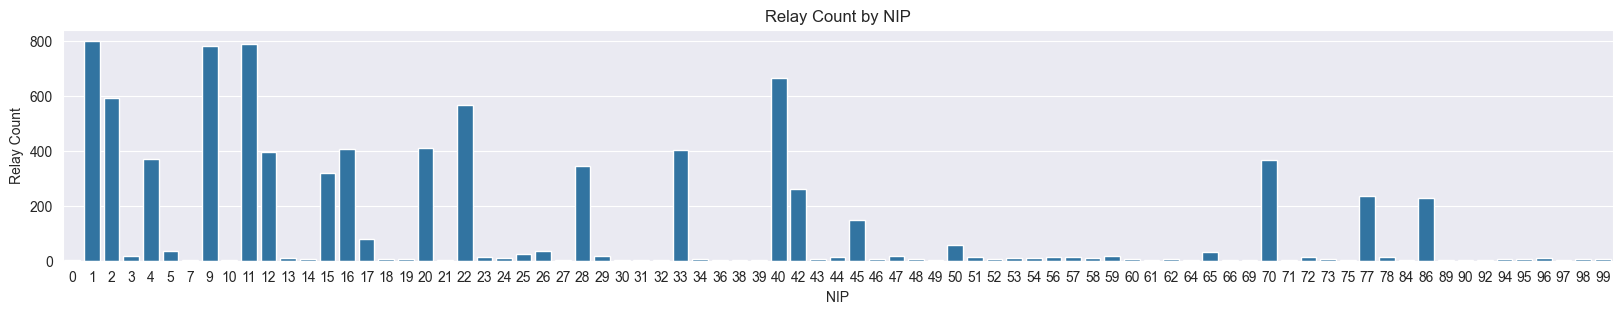

In [168]:
fig, ax = plt.subplots(figsize = ( 20 , 3 ))
sb.barplot(data=grouped)
ax.set_xlabel('NIP')
ax.set_ylabel('Relay Count')
plt.title('Relay Count by NIP')
plt.show()

Below we show the covariance heatmap of given NIPs

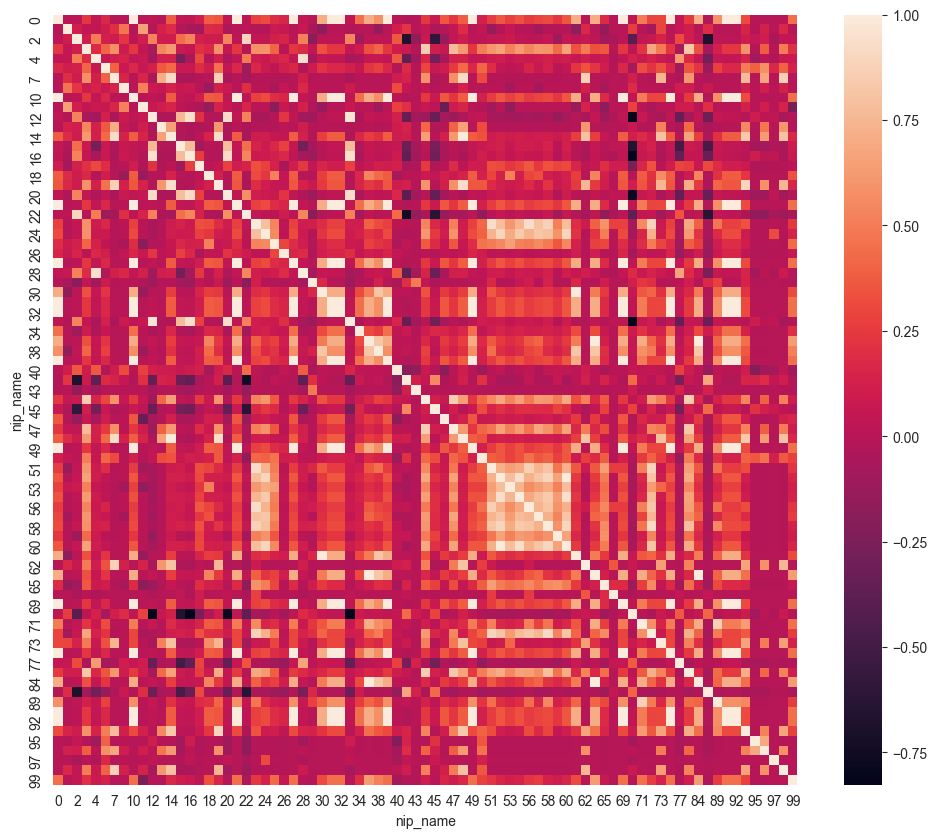

In [169]:
fig, ax = plt.subplots(figsize = ( 12 , 10 ))
co_mtx = crosstab.corr(numeric_only=True)
sb.color_palette("rocket", as_cmap=True)
sb.heatmap(data=co_mtx, annot=False)
plt.show()

Some trends are visible where there are common groups of NIPs present in the relays. 